In [65]:
import shutil
shutil.rmtree('National Leaders', ignore_errors=True)

In [5]:
!pip install fastdownload
!pip install duckduckgo_search
!pip install -Uqq fastai
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from time import sleep
import timm 

In [69]:
def search_images(term, max_images = 300):
    print(f"Searching for {term}")
    return L(ddg_images(term, max_results= max_images)).itemgot('image')
urls = search_images('narendra modi', max_images =1)
urls[0]


Searching for narendra modi


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://images.newindianexpress.com/uploads/user/imagelibrary/2017/12/6/original/NarendraModirocks.jpg'

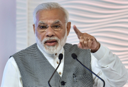

In [107]:
dest = 'images/narendra modi.jpg'
download_url(urls[0], dest, show_progress = False)
im = Image.open(dest)
im = im.to_thumb(128,128)
im

In [71]:
national_leaders = 'narendra modi', 'Vladimir Vladimirovich Putin', 'Donald Trump'
path =Path('National_leaders')
for o in national_leaders:
  dest = (path/o)
  dest.mkdir(exist_ok = True, parents = True)
  download_images(dest, urls= search_images(f'{o} face clear images'))
  resize_images(path/o, max_size = 224, dest = path/o)


Searching for narendra modi face clear images


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Searching for Vladimir Vladimirovich Putin face clear images
Searching for Donald Trump face clear images


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [72]:
fns = get_image_files(path)
failed = verify_images(fns)
len(failed)

12

In [73]:
failed = verify_images(fns)
for f in failed:
    f.unlink()

In [74]:
fns = get_image_files(path)
failed = verify_images(fns)
len(failed)

0

In [75]:
leaders = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, item_tfms=Resize(224))


In [76]:
dls = leaders.dataloaders(path)

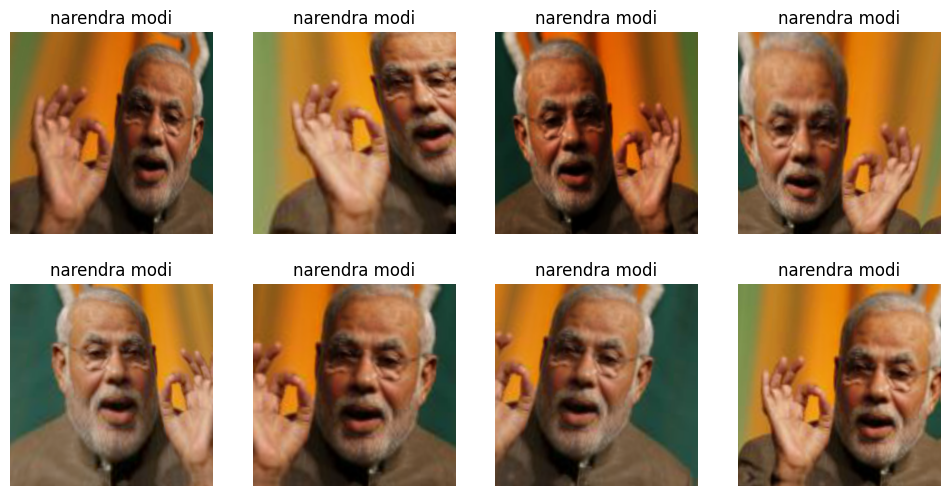

In [77]:
leaders = leaders.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = leaders.dataloaders(path)

dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [78]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(8)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.414638,0.806350,0.333333,00:06
1,0.914236,0.360325,0.152174,00:05
2,0.668669,0.212856,0.072464,00:06
3,0.530591,0.189942,0.057971,00:06
4,0.434121,0.180535,0.050725,00:05


In [79]:
interp = ClassificationInterpretation.from_learner(learn)

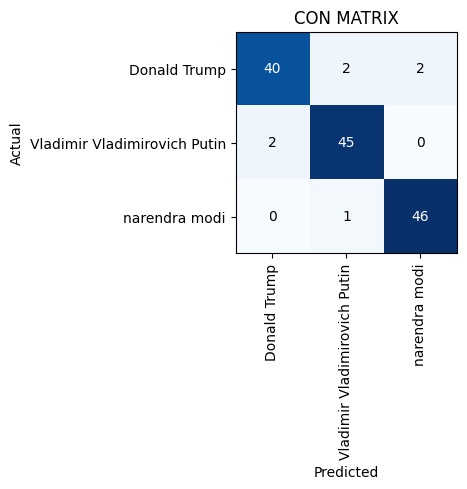

In [80]:
interp.plot_confusion_matrix(title="CON MATRIX")

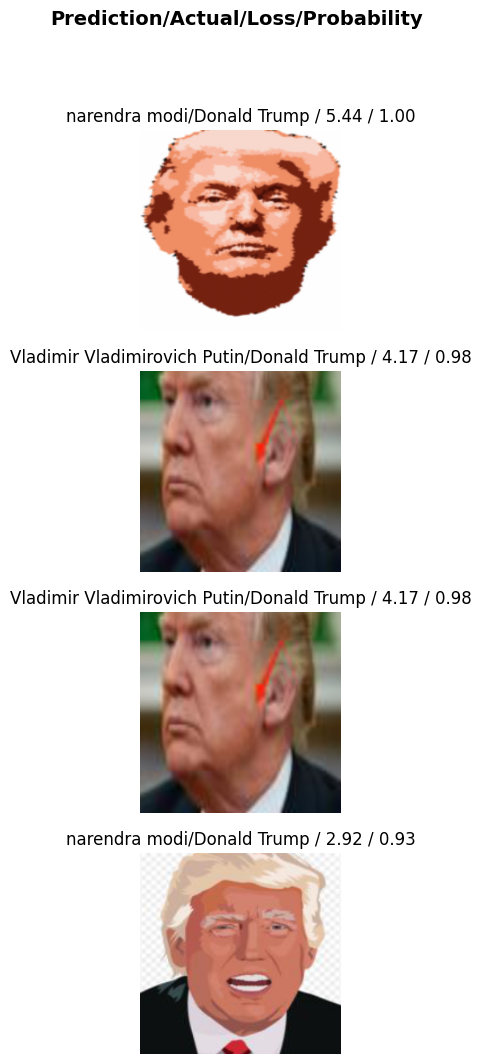

In [81]:
interp.plot_top_losses(4, nrows=4)

In [15]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)

NameError: ignored

In [89]:
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], path/cat))

In [92]:
leaders = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

dls = leaders.dataloaders(path)
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fit_one_cycle(8)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.594373,0.674424,0.328467,00:06
1,1.081478,0.309593,0.124088,00:05
2,0.756859,0.144701,0.058394,00:05
3,0.589082,0.135919,0.051095,00:05
4,0.473812,0.074985,0.029197,00:06
5,0.380863,0.061371,0.029197,00:05
6,0.322797,0.067312,0.029197,00:05
7,0.282027,0.066853,0.029197,00:05


In [2]:
learn.export('leaders.pkl')

NameError: ignored

In [8]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('leaders.pkl')]

In [9]:
learn_inf = load_learner(path/'leaders.pkl')

In [11]:
leader_name, _, prob = learn_inf.predict(PILImage.create('images/narendra modi.jpg'))
print(f'This is a :{leader_name}')
print(f"Probability it is a {leader_name}: {prob[2]:.4f}")

This is a :narendra modi
Probability it is a narendra modi: 1.0000
